#  Simple Linear Regression(delivery_time)

Delivery_time -> Predict delivery time using sorting time 
Build a simple linear regression model by performing EDA and do necessary transformations 
and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### EDA and Visualisation

In [4]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [12]:
df.shape

(21, 2)

In [13]:
df.dtypes

DT    float64
ST      int64
dtype: object

In [14]:
df.isna().sum()

DT    0
ST    0
dtype: int64

In [15]:
#Feature Engineering
df=df.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis=1)
df

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

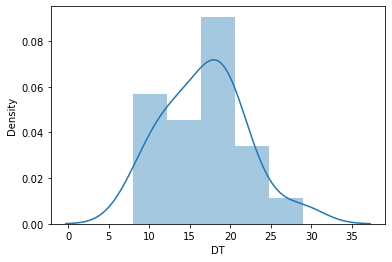

In [16]:
sns.distplot(df['DT'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

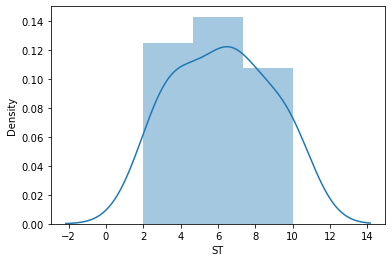

In [17]:
sns.distplot(df['ST'])

#### correlation analysis

In [18]:
df.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


#### model building

In [19]:
import statsmodels.formula.api as smf

In [20]:
model=smf.ols("DT~ST",data=df).fit()

In [21]:
model

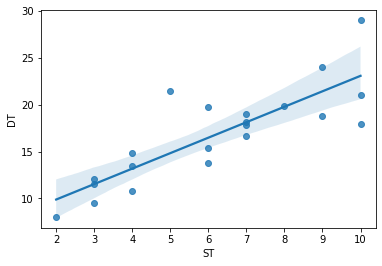

In [22]:
#to see the best fit line
sns.regplot(x="ST",y="DT",data=df);

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        08:02:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model Testing

In [24]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [25]:
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [26]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [27]:
model.tvalues

Intercept    3.823349
ST           6.387447
dtype: float64

In [28]:
model.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

In [29]:
#finding Rsquared values
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

#### Model Predictions

In [30]:
#Manual prediction for say sorting time 5
Delivery_time=(6.582734)+(1.649020)*(5)
Delivery_time

14.827834

In [31]:
#Automatic prediction for sorting time(5,8)
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [34]:
data_pred=pd.DataFrame(new_data,columns=['ST'])
data_pred

,ST
0,5
1,8


In [35]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64